In [12]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

In [26]:
### read dataset
train = pd.read_csv("./input/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values #values: only number value
train_y = train['label'].values

## normalize and reshape the predictors  
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              501000

In [18]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 6s 222ms/step - loss: 0.1265 - val_loss: 0.0708
Epoch 2/20
24/24 [==============================] - 5s 209ms/step - loss: 0.0676 - val_loss: 0.0534
Epoch 3/20
24/24 [==============================] - 5s 211ms/step - loss: 0.0496 - val_loss: 0.0420
Epoch 4/20
24/24 [==============================] - 5s 194ms/step - loss: 0.0402 - val_loss: 0.0373
Epoch 5/20
24/24 [==============================] - 5s 195ms/step - loss: 0.0369 - val_loss: 0.0354
Epoch 6/20
24/24 [==============================] - 5s 202ms/step - loss: 0.0350 - val_loss: 0.0327
Epoch 7/20
24/24 [==============================] - 5s 200ms/step - loss: 0.0324 - val_loss: 0.0305
Epoch 8/20
24/24 [==============================] - 5s 221ms/step - loss: 0.0296 - val_loss: 0.0283
Epoch 9/20
24/24 [==============================] - 5s 214ms/step - loss: 0.0273 - val_loss: 0.0258
Epoch 10/20
24/24 [==============================] - 5s 209ms/step - loss: 0.0258 - val_loss: 0.0247

In [19]:
preds = model.predict(val_x)

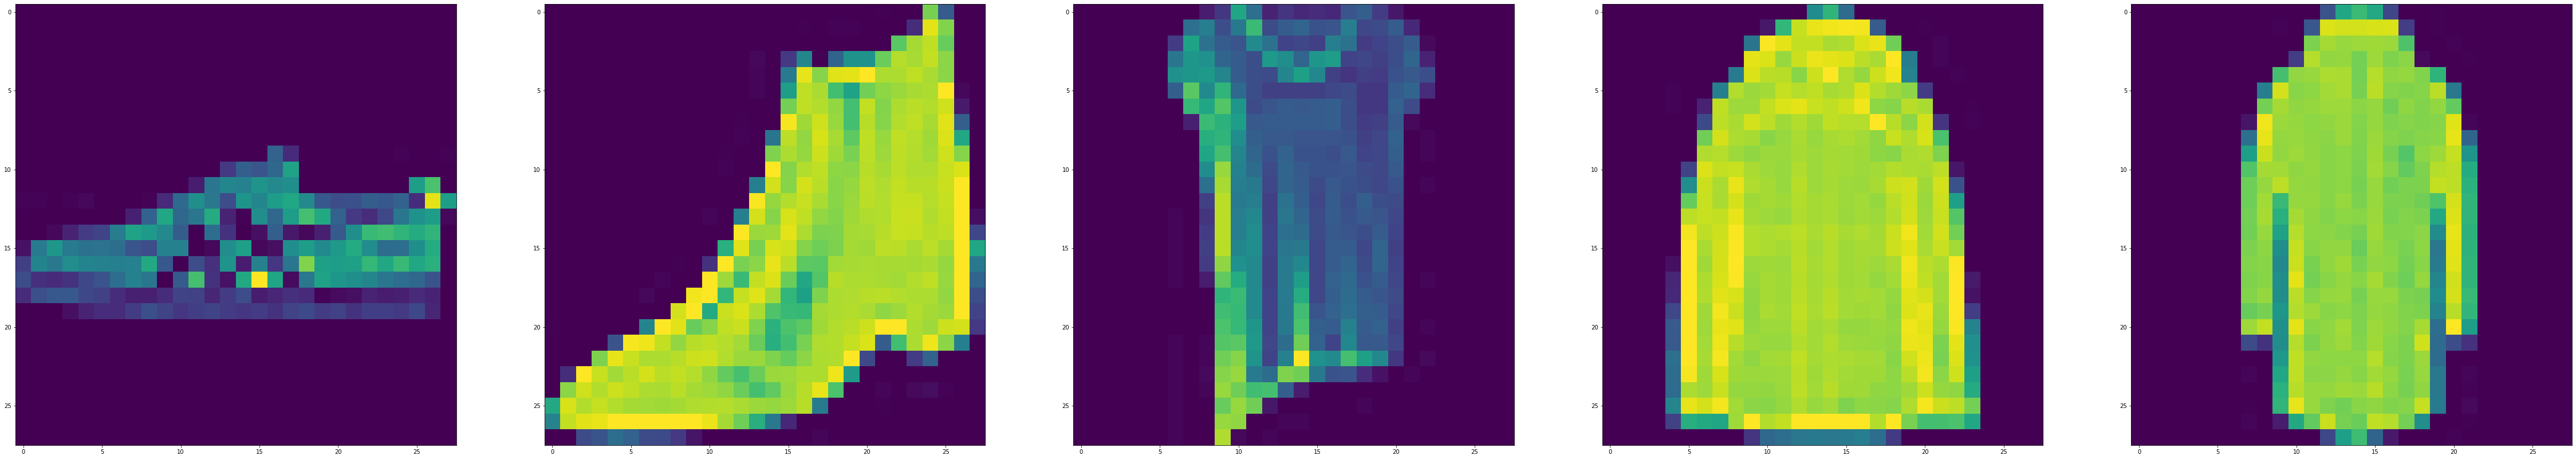

In [20]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

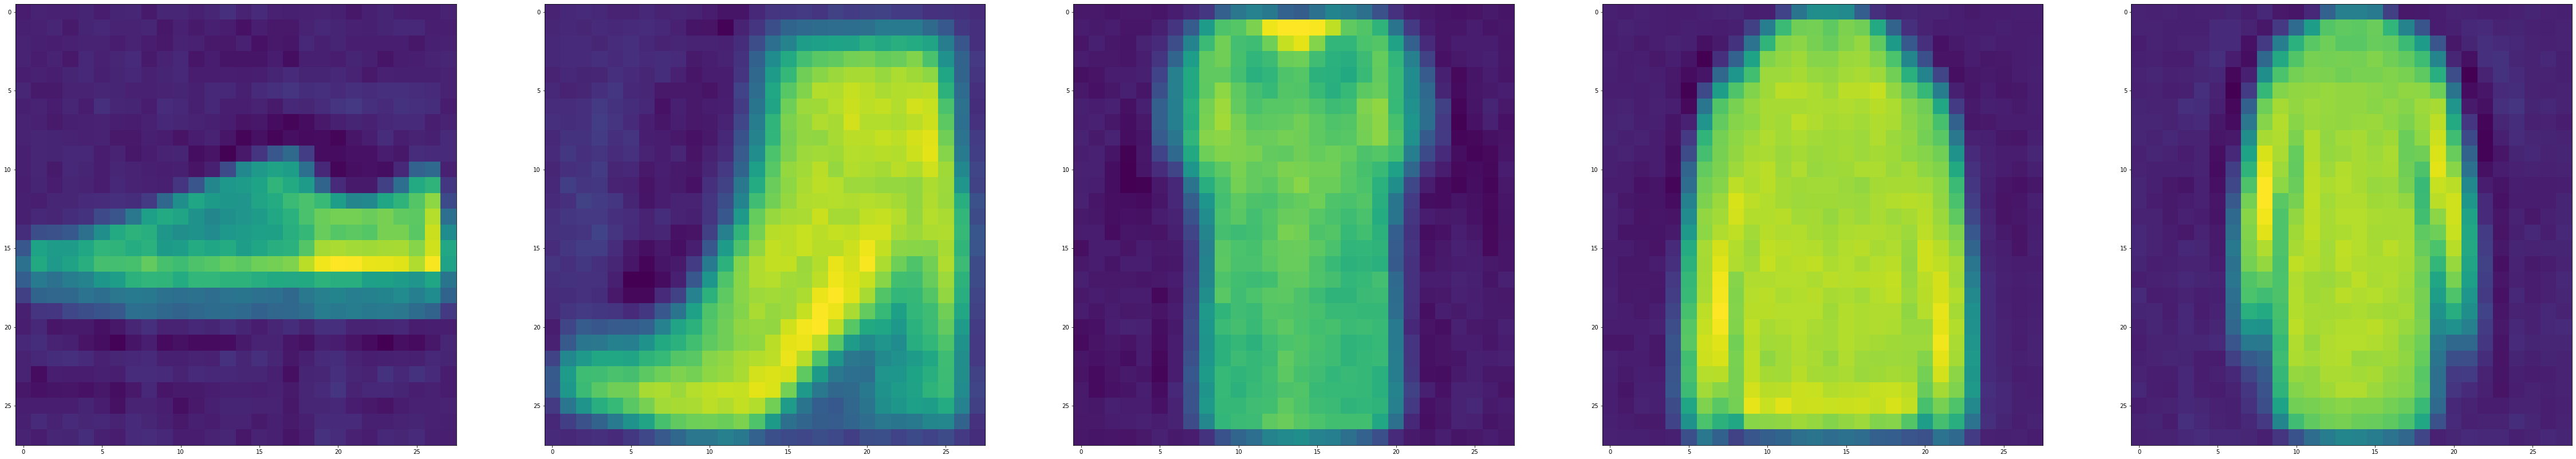

In [21]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()